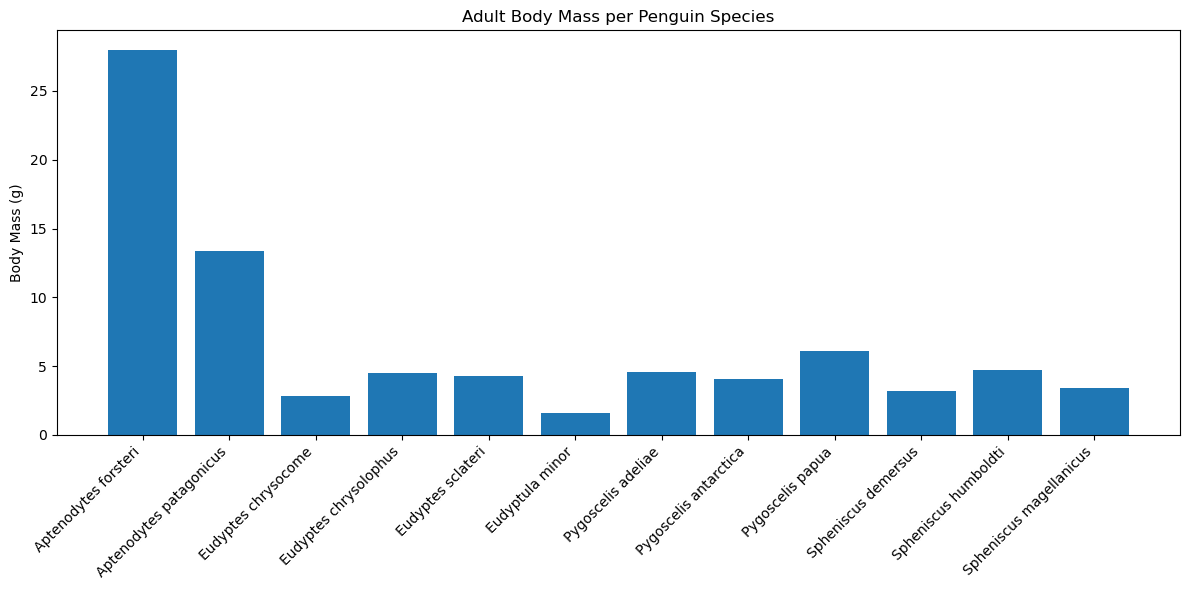

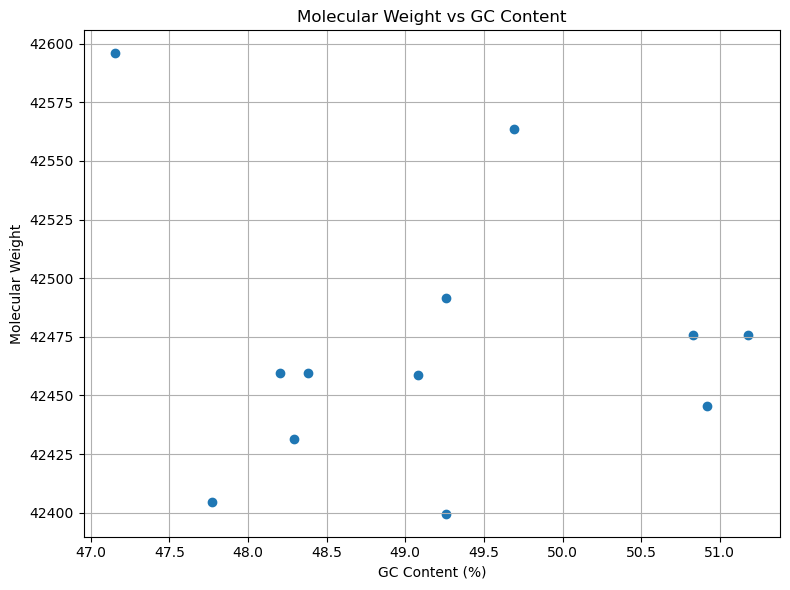

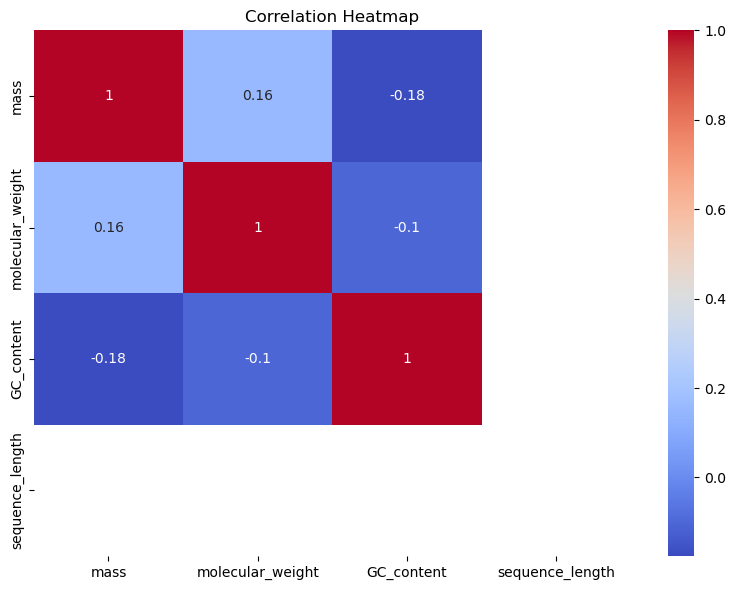

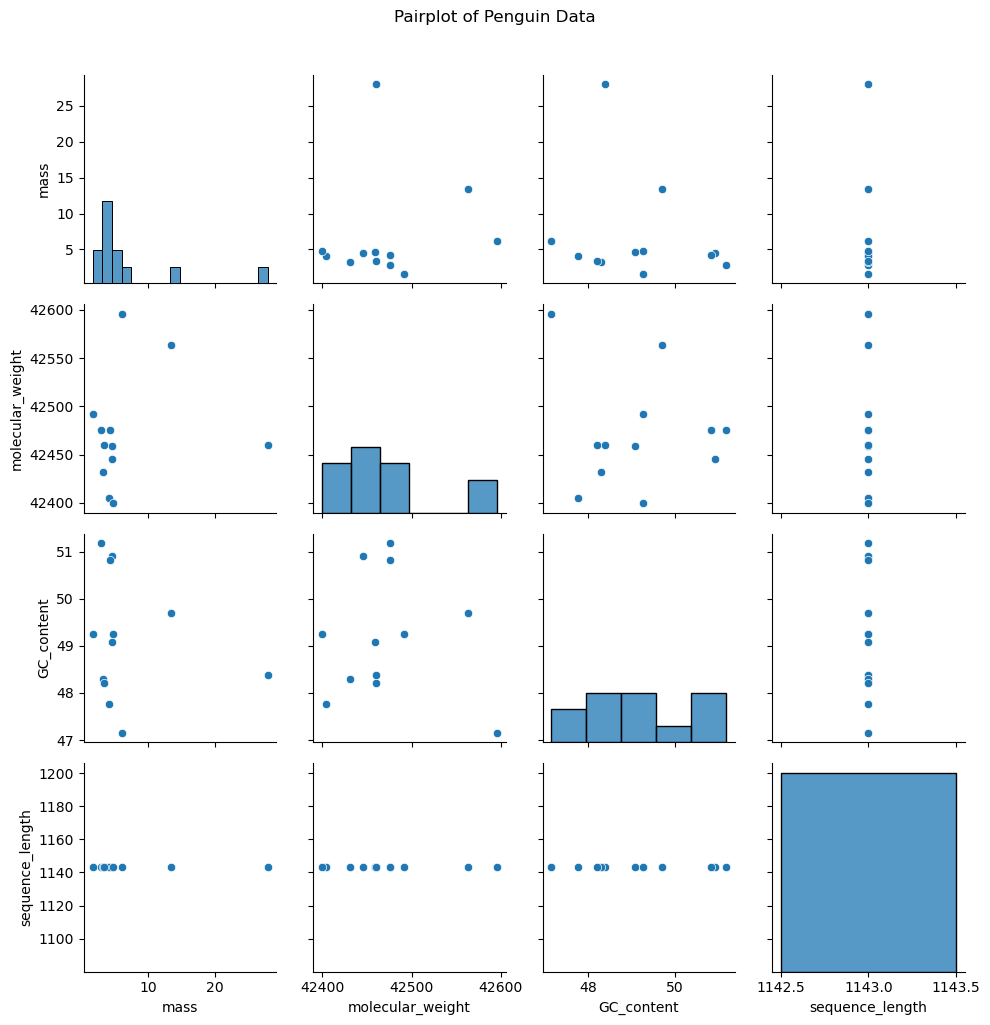

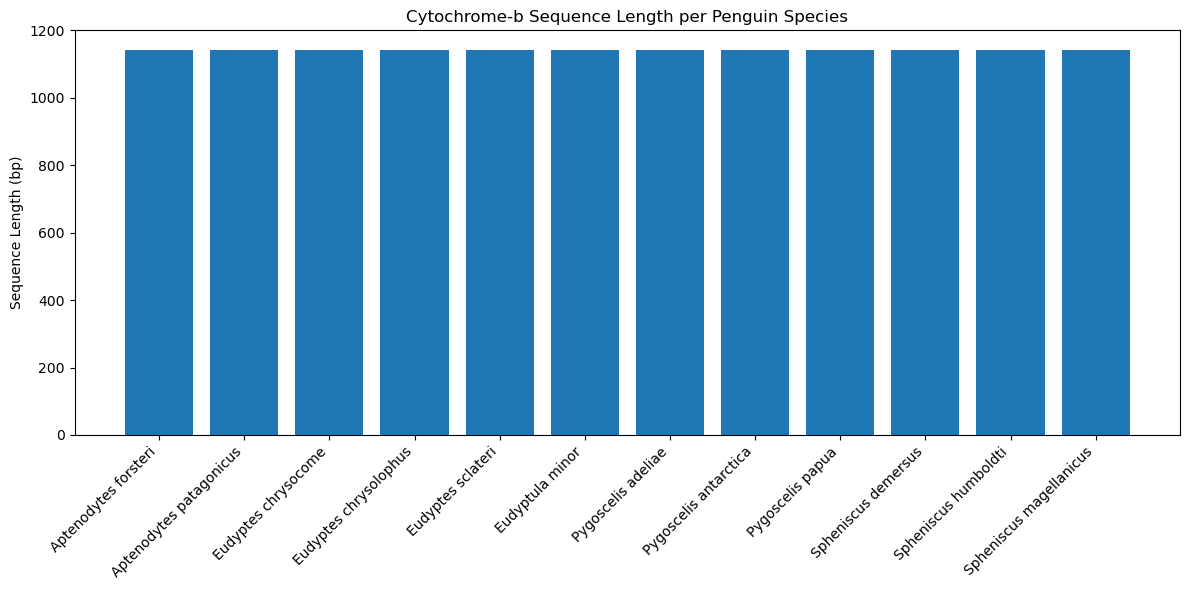

In [10]:
# BCB546 - Python Assignment: Penguin Sequence Analysis

# Step 1: Import necessary libraries
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Function to extract sequences from FASTA
def get_sequences_from_file(fasta_fn):
    """
    Reads a FASTA file and extracts sequences into a dictionary.
    Args:
        fasta_fn (str): Path to FASTA file
    Returns:
        dict: species name as key, DNA sequence as value
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict

# Step 3: Translate DNA to amino acids manually
def translate_function(nucleotide_seq):
    """
    Translates DNA sequence to amino acid sequence using Vertebrate Mitochondrial table.
    Args:
        nucleotide_seq (str): DNA sequence
    Returns:
        str: Amino acid sequence
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    for i in range(0, len(nucleotide_seq) - 2, 3):
        codon = str(nucleotide_seq[i:i+3])
        if codon in mito_table.stop_codons:
            break
        aa = mito_table.forward_table.get(codon, 'X')
        aa_seq_string += aa
    return aa_seq_string

# Step 4: Alternative translation using BioPython
# def alternative_translate(seq):
#     return str(seq.translate(table="Vertebrate Mitochondrial", to_stop=True))

# Step 5: Compute molecular weight
def compute_molecular_weight(aa_seq):
    """
    Computes molecular weight of a protein sequence.
    Args:
        aa_seq (str): Amino acid sequence
    Returns:
        float: Molecular weight
    """
    analysed_seq = ProteinAnalysis(aa_seq)
    return analysed_seq.molecular_weight()

# Step 6: Compute GC content
def compute_gc_content(dna_seq):
    """
    Computes GC content percentage of a DNA sequence.
    Args:
        dna_seq (str): DNA sequence
    Returns:
        float: GC content percentage
    """
    seq = str(dna_seq).upper()
    gc_count = seq.count("G") + seq.count("C")
    return (gc_count / len(seq)) * 100 if len(seq) > 0 else 0

# Step 7: Load data files
cytb_seqs = get_sequences_from_file(r"C:\Users\risha\Downloads\penguins_cytb.fasta")
penguins_df = pd.read_csv(r"C:\Users\risha\Downloads\penguins_mass.csv")

# Step 8: Add columns to DataFrame
penguins_df["molecular_weight"] = float('nan')
penguins_df["GC_content"] = float('nan')
penguins_df["sequence_length"] = float('nan')

# Step 9: Fill DataFrame with calculated values
for index, row in penguins_df.iterrows():
    species = row["species"]
    seq = cytb_seqs.get(species)
    if seq:
        aa_seq = translate_function(seq)
        mw = compute_molecular_weight(aa_seq)
        gc = compute_gc_content(seq)
        penguins_df.at[index, "molecular_weight"] = mw
        penguins_df.at[index, "GC_content"] = gc
        penguins_df.at[index, "sequence_length"] = len(seq)

# Step 10: Plot bar chart of body mass
plt.figure(figsize=(12, 6))
plt.bar(penguins_df["species"], penguins_df["mass"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Body Mass (g)")
plt.title("Adult Body Mass per Penguin Species")
plt.tight_layout()
plt.show()

# Step 11: Plot molecular weight vs GC content
plt.figure(figsize=(8, 6))
plt.scatter(penguins_df["GC_content"], penguins_df["molecular_weight"])
plt.xlabel("GC Content (%)")
plt.ylabel("Molecular Weight")
plt.title("Molecular Weight vs GC Content")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Save final DataFrame
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

# Step 13: Additional plots

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(penguins_df[["mass", "molecular_weight", "GC_content", "sequence_length"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Pairplot to observe clustering and relationships
sns.pairplot(penguins_df[['mass', 'molecular_weight', 'GC_content', 'sequence_length']])
plt.suptitle("Pairplot of Penguin Data", y=1.02)
plt.tight_layout()
plt.show()

# Additional: barplot for sequence lengths
plt.figure(figsize=(12, 6))
plt.bar(penguins_df["species"], penguins_df["sequence_length"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sequence Length (bp)")
plt.title("Cytochrome-b Sequence Length per Penguin Species")
plt.tight_layout()
plt.show()
